# <02_EDA>

* 데이터 전처리
* EDA
* 분석 내용
* 인사이트

# 3.EDA

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

In [19]:
plt.rc("font", family="Malgun Gothic")
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False}, style='darkgrid') # 음수 부호 깨짐 방지, 그래프 배경색

In [2]:
data = pd.read_csv('data/data_pre.csv', encoding='cp949')
data_exp = pd.read_csv('data/data_pre_exp.csv', encoding='cp949')
price = pd.read_csv('data/price.csv', encoding='cp949')
customer = pd.read_csv('data/customer.csv', index_col='구매번호')

data['일시'] = pd.to_datetime(data['일시'])
data_exp['일시'] = pd.to_datetime(data_exp['일시'])

In [3]:
display(data_exp.head(3))
display(customer.head(3))

,일시,요일,날씨,포스번호,영수번호,메뉴번호,메뉴,수량,매출,구매번호
0,2022-10-19 19:01:00,수,맑음,3,1,14097,생수,1,909,1019-3-1
1,2022-10-19 19:01:00,수,맑음,3,1,32487,아이스티(복숭아),1,4545,1019-3-1
2,2022-10-19 19:03:00,수,맑음,1,1,32292,스프라이트,1,3182,1019-1-1


,Beer set,Couple set A,Couple set B,Family set,Single set,뉴욕핫도그,미닛메이드 오렌지,미닛메이드 포도,뱅쇼(G),사케,...,컵와인 핑크모스카토,코카콜라,클라우드(캔),토레타,프레즐,하겐다즈 딸기,하겐다즈 바닐라,하겐다즈 쵸코,핫초코,허브티
구매번호,,,,,,,,,,,,,,,,,,,,,
1019-1-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1019-1-10,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1019-1-104,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [4]:
data['포스번호'].sort_values().unique()

array([1, 2, 3, 4, 5], dtype=int64)

## 3-1.인기 메뉴

### 3-1-1.메뉴 매출 순위
* 매출액 순위

In [160]:
list(sales_count.head(10)['메뉴'])

['츄러스',
 '생수',
 '캬라멜팝콘(M)',
 '코카콜라',
 '캬라멜 팝콘(L)',
 '클라우드(캔)',
 '아이스 아메리카노(Ice Coffee)',
 '뉴욕핫도그',
 '아메리카노(Americano)',
 'Couple set A']

In [6]:
sales_price = data.groupby('메뉴', as_index=False)['매출'].sum().sort_values(by='매출', ascending=False, ignore_index=True)
sales_price['rank_price'] = sales_price['매출'].rank(method='min', ascending=False).astype(int)
display(sales_price.head(5))
display(sales_price.tail(5))

,메뉴,매출,rank_price
0,츄러스,38214360,1
1,캬라멜팝콘(M),37210000,2
2,캬라멜 팝콘(L),21245667,3
3,Couple set A,20159370,4
4,뉴욕핫도그,10806072,5


,메뉴,매출,rank_price
30,하겐다즈 바닐라,776408,31
31,Couple set B,465456,32
32,사케,450000,33
33,뱅쇼(G),280000,34
34,샤퀴테리 Box (4구),95452,35


### 3-1-2.메뉴 판매량 순위
* 판매수량 순위

In [7]:
sales_count = data.groupby('메뉴', as_index=False)['수량'].sum().sort_values(by='수량', ascending=False, ignore_index=True)
sales_count['rank_count'] = sales_count['수량'].rank(method='min', ascending=False).astype(int)
display(sales_count.head(5))
display(sales_count.tail(5))

,메뉴,수량,rank_count
0,츄러스,8408,1
1,생수,7736,2
2,캬라멜팝콘(M),7442,3
3,코카콜라,2714,4
4,캬라멜 팝콘(L),2337,5


,메뉴,수량,rank_count
30,하겐다즈 바닐라,122,31
31,사케,45,32
32,뱅쇼(G),28,33
33,Couple set B,16,34
34,샤퀴테리 Box (4구),7,35


### 3-1-3.단위당 수익 비교
* 일반적으로 판매량 대비 수익이 클수록 효율적인 판매

In [10]:
sales_unit = pd.merge(sales_price.drop(columns='rank_price', axis=1), sales_count.drop(columns='rank_count', axis=1),
                      how='inner', on='메뉴')
sales_unit['단위당수익'] = (sales_unit['매출'] / sales_unit['수량']).round(1)
sales_unit['rank_unit'] = sales_unit['단위당수익'].rank(method='min', ascending=False).astype(int)
sales_unit.sort_values(by='rank_unit', ascending=True, inplace=True)
display(sales_unit.head(5))
display(sales_unit.tail(5))

,메뉴,매출,수량,단위당수익,rank_unit
14,Family set,4976349,161,30909.0,1
31,Couple set B,465456,16,29091.0,2
12,Beer set,6218320,380,16364.0,3
3,Couple set A,20159370,1386,14545.0,4
34,샤퀴테리 Box (4구),95452,7,13636.0,5


,메뉴,매출,수량,단위당수익,rank_unit
27,미닛메이드 포도,1021716,281,3636.0,30
15,스프라이트,4149328,1304,3182.0,32
7,코카콜라,8635948,2714,3182.0,32
21,토레타,2294222,721,3182.0,32
10,생수,7032024,7736,909.0,35


## 3-2.메뉴와 외부요인
* 비고) 좌석의 환경 상 음식 먹기 불편하다는 의견이 있음.

### 3-2-1.날씨에 따른 메뉴 매출/판매량 순위
* 맑음/흐림/비/눈 매출 비교
* 날씨와 매출의 관계
<br><br>
* 기온?

In [16]:
weater_tag = ['맑음', '흐림', '비', '눈']
w_list = []
for wtag in weater_tag:
    w_loc = data.loc[data['날씨'] == wtag]
    w_dic = {'날씨':[wtag], '수량':[w_loc['수량'].sum()], '매출':[w_loc['매출'].sum()]}
    w_df = pd.DataFrame(w_dic)
    w_list.append(w_df)

In [17]:
weather = pd.concat(w_list, ignore_index=True)
weather

,날씨,수량,매출
0,맑음,34370,169215831
1,흐림,5079,25130342
2,비,2396,11063415
3,눈,6684,33312495


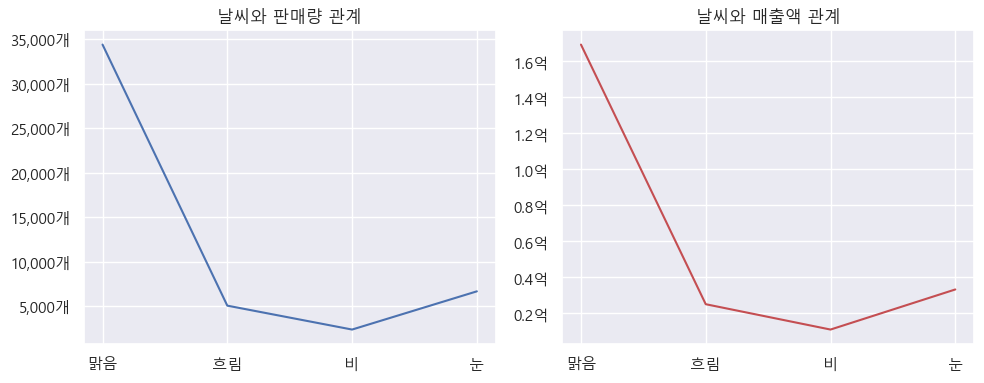

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

# Graph 1
ax1.plot(weather['날씨'], weather['수량'], 'b-', label='판매량')
current_values1 = ax1.get_yticks()
ax1.yaxis.set_major_locator(plt.FixedLocator(current_values1)) # 레이블 수동 설정에 대한 위치정보 명시적 설정
ax1.set_yticklabels(['{:,.0f}개'.format(x) for x in current_values1]) # 천단위 콤마

ax1.set_title("날씨와 판매량 관계")

# Graph 2
ax2.plot(weather['날씨'], weather['매출'], 'r-', label='매출액')
# ax2.ticklabel_format(axis='y', useOffset=False, style='plain') # 지수표현 제거
current_values2 = ax2.get_yticks()
ax2.yaxis.set_major_locator(plt.FixedLocator(current_values2))
ax2.set_yticklabels(['{:,.1f}억'.format(x/1e8) for x in current_values2])

ax2.set_title("날씨와 매출액 관계")

fig.tight_layout()
plt.show()

### 3-2-2.주말여부에 따른 메뉴 매출/판매량 비교
* 평일-주말 매출 비교

In [54]:
data['일시'].dt.day_of_week

0        2
1        2
2        2
3        2
4        2
        ..
39744    6
39745    6
39746    6
39747    6
39748    6
Name: 일시, Length: 39749, dtype: int64

In [73]:
weekday = data.loc[data['일시'].dt.day_of_week < 5]
weekday_days = weekday['요일'].nunique() # 화, 수, 목, 금
weekend = data.loc[data['일시'].dt.day_of_week >= 5]
weekend_days = weekend['요일'].nunique() # 토, 일

wd_df = pd.DataFrame({'주말여부':[False], '판매량':[weekday['수량'].sum()], '매출액':[weekday['매출'].sum()],
                      '일평균판매량':[round(weekday['수량'].sum()/weekday_days, 1)], '일평균매출액':[round(weekday['매출'].sum()/weekday_days, 1)]})
we_df = pd.DataFrame({'주말여부':[True], '판매량':[weekend['수량'].sum()], '매출액':[weekend['매출'].sum()],
                      '일평균판매량':[round(weekend['수량'].sum()/weekend_days, 1)], '일평균매출액':[round(weekend['매출'].sum()/weekend_days, 1)]})

week = pd.concat([wd_df, we_df], ignore_index=True)
week

,주말여부,판매량,매출액,일평균판매량,일평균매출액
0,False,19266,93782531,4816.5,23445632.8
1,True,29263,144939552,14631.5,72469776.0


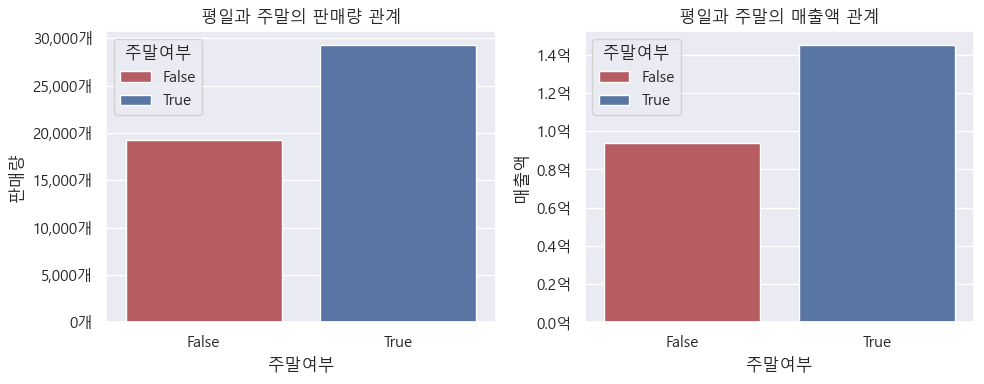

In [83]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

# Graph 1
sns.barplot(x='주말여부', y='판매량', data=week, ax=ax1,
            hue='주말여부', palette={False: 'r', True: 'b'})
current_values1 = ax1.get_yticks()
ax1.yaxis.set_major_locator(plt.FixedLocator(current_values1))
ax1.set_yticklabels(['{:,.0f}개'.format(x) for x in current_values1]) # 천단위 콤마

ax1.set_title("평일과 주말의 판매량 관계")

# Graph 2
sns.barplot(x='주말여부', y='매출액', data=week, ax=ax2,
            hue='주말여부', palette={False: 'r', True: 'b'})
current_values2 = ax2.get_yticks()
ax2.yaxis.set_major_locator(plt.FixedLocator(current_values2))
ax2.set_yticklabels(['{:,.1f}억'.format(x/1e8) for x in current_values2])

ax2.set_title("평일과 주말의 매출액 관계")

fig.tight_layout()
plt.show()

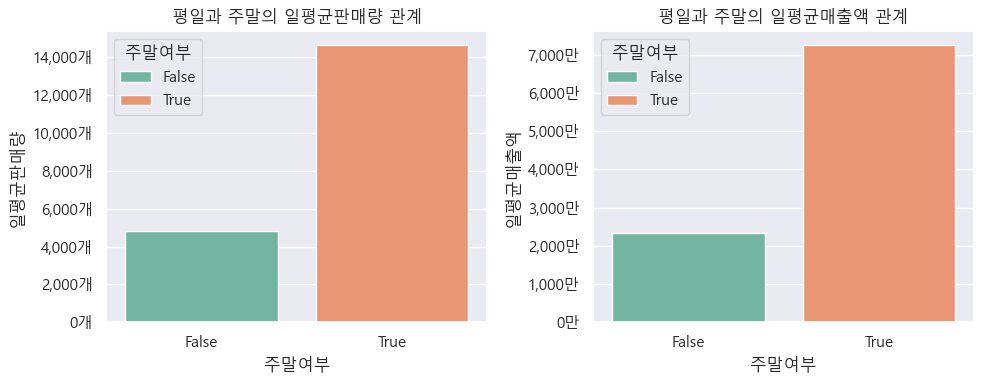

In [84]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

# Graph 1
sns.barplot(x='주말여부', y='일평균판매량', data=week, ax=ax1,
            hue='주말여부', palette='Set2')
current_values1 = ax1.get_yticks()
ax1.yaxis.set_major_locator(plt.FixedLocator(current_values1))
ax1.set_yticklabels(['{:,.0f}개'.format(x) for x in current_values1]) # 천단위 콤마

ax1.set_title("평일과 주말의 일평균판매량 관계")

# Graph 2
sns.barplot(x='주말여부', y='일평균매출액', data=week, ax=ax2,
            hue='주말여부', palette='Set2')
current_values2 = ax2.get_yticks()
ax2.yaxis.set_major_locator(plt.FixedLocator(current_values2))
ax2.set_yticklabels(['{:,.0f}만'.format(x/1e4) for x in current_values2])

ax2.set_title("평일과 주말의 일평균매출액 관계")

fig.tight_layout()
plt.show()

### 3-2-3.요일에 따른 메뉴 매출 순위
* 요일별 매출 비교

In [146]:
days = data['요일'].unique().tolist()
days = days[-1:] + days[:-1]
days

['화', '수', '목', '금', '토', '일']

In [152]:
days_df = pd.DataFrame()
for d in days:
    d_loc = data.loc[data['요일'] == d].copy()
    d_loc['날짜'] = d_loc['일시'].dt.strftime('%Y-%m-%d')
    day_count = len(d_loc.drop_duplicates('날짜'))
    d_df = pd.DataFrame({'요일':[d], '요일횟수':[day_count],
                         '총매출액':d_loc['매출'].sum(), '일평균매출액':[round(d_loc['매출'].sum() / day_count)]})
    days_df = pd.concat([days_df, d_df], ignore_index=True)

days_df

,요일,요일횟수,총매출액,일평균매출액
0,화,3,7831192,2610397
1,수,11,24697657,2245242
2,목,11,23837246,2167022
3,금,11,37416436,3401494
4,토,11,78652352,7150214
5,일,11,66287200,6026109


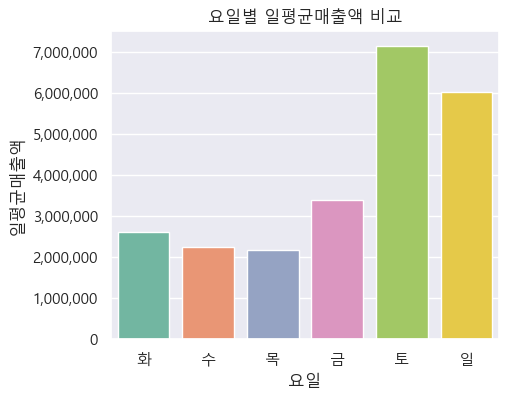

In [155]:
fig, ax = plt.subplots(1, 1, figsize=(5,4))

sns.barplot(x='요일', y='일평균매출액', data=days_df, ax=ax,
            hue='요일', palette='Set2')
current_values = ax.get_yticks()
ax.yaxis.set_major_locator(plt.FixedLocator(current_values))
ax.set_yticklabels(['{:,.0f}'.format(x) for x in current_values]) # 천단위 콤마

ax.set_title("요일별 일평균매출액 비교")

plt.show()

## 3-3.매출 요인 분석

### 3-3-1.매출 이상치
* 사분위수 방법 -> 이상치에 해당하는 값 없음.
* Z-score 방법
* 상위 10%의 데이터(5개), 하위 10%의 데이터(5개)

In [91]:
day_sales = data.copy()
day_sales['날짜'] = day_sales['일시'].dt.strftime('%Y-%m-%d')
day_sales = day_sales.groupby('날짜', as_index=False)['매출'].sum()
display(day_sales.head(2))
display(day_sales.tail(2))

,날짜,매출
0,2022-10-19,2119497
1,2022-10-20,2584042


,날짜,매출
56,2022-12-31,10440204
57,2023-01-01,6892138


In [100]:
# 사분위수 방법
iqr_range = day_sales['매출'].quantile(0.75) - day_sales['매출'].quantile(0.25)
out_lb = day_sales['매출'].quantile(0.25) - (1.5 * iqr_range)
out_ub = day_sales['매출'].quantile(0.75) + (1.5 * iqr_range)

day_sales.loc[(day_sales['매출'] < out_lb) | (day_sales['매출'] > out_ub)]

,날짜,매출


In [104]:
# z-score 방법 (95%: |2|sigma, 99.7%: |3|sigma)
z_sales = day_sales.copy()
sales_mean, sales_std = z_sales['매출'].mean(), z_sales['매출'].std()
z_sales['z매출'] = (z_sales['매출'] - sales_mean) / sales_std

outlier_z = z_sales.loc[(z_sales['z매출'] < -2) | (z_sales['z매출'] > 2)]
outlier_z

,날짜,매출,z매출
34,2022-12-03,8814397,2.015623
56,2022-12-31,10440204,2.713083


In [132]:
# 상위 5개, 하위 5개 데이터
day_sales_sort = day_sales.sort_values(by='매출', ascending=False)
sales_top5 = day_sales_sort.head(5).copy()
sales_top5['요일'] = pd.to_datetime(sales_top5['날짜']).dt.day_name()
sales_under5 = day_sales_sort.tail(5).copy()
sales_under5['요일'] = pd.to_datetime(sales_under5['날짜']).dt.day_name()
display(sales_top5)
display(sales_under5)

,날짜,매출,요일
56,2022-12-31,10440204,Saturday
34,2022-12-03,8814397,Saturday
39,2022-12-10,8146609,Saturday
13,2022-11-05,7926200,Saturday
29,2022-11-26,7711198,Saturday


,날짜,매출,요일
10,2022-11-02,1804970,Wednesday
32,2022-12-01,1722251,Thursday
27,2022-11-24,1703131,Thursday
26,2022-11-23,1609506,Wednesday
42,2022-12-15,1274079,Thursday


In [ ]:
# 상위 10개, 하위10개 데이터
sales_top10 = day_sales_sort.head(10).copy()
sales_top10['요일'] = pd.to_datetime(sales_top10['날짜']).dt.day_name()
sales_under10 = day_sales_sort.tail(10).copy()
sales_under10['요일'] = pd.to_datetime(sales_under10['날짜']).dt.day_name()

### 3-3-2.매출이 높은 날은 어떤 메뉴의 매출이 높은지?

In [125]:
sales_high = data.loc[data['일시'].dt.strftime('%Y-%m-%d').isin(sales_top5['날짜'])]
sales_high2 = sales_high.groupby('메뉴', as_index=False)['매출'].sum().sort_values(by='매출', ascending=False, ignore_index=True)
display(sales_high2.head())
display(sales_high2.tail())

,메뉴,매출
0,캬라멜팝콘(M),7205000
1,츄러스,6653880
2,캬라멜 팝콘(L),3863675
3,Couple set A,3330805
4,뉴욕핫도그,2170124


,메뉴,매출
27,하겐다즈 쵸코,190920
28,사케,160000
29,허브티,114548
30,하겐다즈 바닐라,108188
31,하겐다즈 딸기,101824


In [134]:
display(sales_high['날씨'].value_counts(normalize=True).round(2).sort_values(ascending=False).to_frame())
display(sales_top5['요일'].value_counts(normalize=True).to_frame())

,날씨
눈,0.45
맑음,0.37
흐림,0.19


,요일
Saturday,1.0


### 3-3-3.매출이 낮은 날은 어떤 메뉴의 매출이 낮은지?

In [135]:
sales_low = data.loc[data['일시'].dt.strftime('%Y-%m-%d').isin(sales_under5['날짜'])]
sales_low2 = sales_low.groupby('메뉴', as_index=False)['매출'].sum().sort_values(by='매출', ascending=True, ignore_index=True)
display(sales_low2.head())
display(sales_low2.tail())

,메뉴,매출
0,하겐다즈 바닐라,6364
1,하겐다즈 쵸코,19092
2,사케,20000
3,미닛메이드 포도,25452
4,하겐다즈 딸기,25456


,메뉴,매출
27,클라우드(캔),500000
28,캬라멜 팝콘(L),663643
29,Couple set A,683615
30,캬라멜팝콘(M),1270000
31,츄러스,1308960


In [136]:
display(sales_low['날씨'].value_counts(normalize=True).round(2).sort_values(ascending=False).to_frame())
display(sales_under5['요일'].value_counts(normalize=True).to_frame())

,날씨
맑음,0.85
눈,0.15


,요일
Thursday,0.6
Wednesday,0.4


In [ ]:
# 날씨보다는 요일이 영향을 크게 끼침.